#  Demonstration: Predicting Lipid Retention Times

This notebook provides a **synthetic example** of the workflow described in our publication:  
[ReTimeML: a retention time predictor that supports the LC–MS/MS analysis of sphingolipids](https://www.nature.com/articles/s41598-024-53860-0).  

The purpose is to illustrate the **machine learning pipeline** (feature preparation, regression, evaluation) using a **simplified synthetic dataset**.  
The real sphingolipid datasets are not publicly available.


In [7]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


1. Generate Synthetic Dataset
We create a small dataset with the following features:
- **m/z ratio** (mass-to-charge ratio)
- **ion type** (e.g., `[M+H]+`, `[M+Na]+`, `[M-H]-`)
- **lipid class** (e.g., Cer, SM, PE, PC)
- **retention time** (target variable, synthetic values)

In [13]:
np.random.seed(42)
n = 200
df = pd.DataFrame({
    "mz": np.random.uniform(400, 900, n),  # mass-to-charge ratio
    "ion_type": np.random.choice(["[M+H]+", "[M+Na]+", "[M-H]-"], n),
    "lipid_class": np.random.choice(["Cer", "SM", "PE", "PC"], n),
    "retention_time": np.random.uniform(2, 20, n)  # synthetic retention time
})

df.head()


,mz,ion_type,lipid_class,retention_time
0,587.270059,[M-H]-,PC,14.712360
1,875.357153,[M+H]+,PC,3.464278
2,765.996971,[M+Na]+,SM,3.527079
3,699.329242,[M+Na]+,SM,19.759512
4,478.009320,[M-H]-,PC,8.736874


##  2. Feature Engineering

We one-hot encode the categorical features (**ion type** and **lipid class**)  
so that they can be used in regression models.

In [14]:
df_encoded = pd.get_dummies(df, columns=["ion_type", "lipid_class"], drop_first=True)

X = df_encoded.drop("retention_time", axis=1)
y = df_encoded["retention_time"]

X.head()


,mz,ion_type_[M+Na]+,ion_type_[M-H]-,lipid_class_PC,lipid_class_PE,lipid_class_SM
0,587.270059,False,True,True,False,False
1,875.357153,False,False,True,False,False
2,765.996971,True,False,False,False,True
3,699.329242,True,False,False,False,True
4,478.009320,False,True,True,False,False


## 3. Train/Test Split

We split the dataset into training (80%) and testing (20%) sets.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4. Model Training: Random Forest Regressor

We train a **Random Forest Regressor** with 100 trees.


In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## 5. Predictions & Evaluation

We evaluate the model using:
- **RMSE** (Root Mean Squared Error)  
- **R²** (coefficient of determination)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R²
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 52.27
RMSE: 7.23
R²: -0.57


## 6. Visualisation: Predicted vs Actual

A scatter plot to compare predicted vs actual retention times.


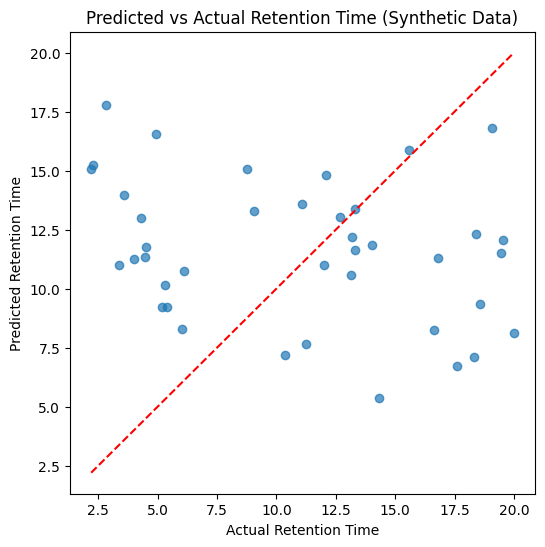

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Retention Time")
plt.ylabel("Predicted Retention Time")
plt.title("Predicted vs Actual Retention Time (Synthetic Data)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()


## 7. Conclusion

This synthetic example demonstrates the **feature engineering and regression workflow**  
described in the ReTimeML publication.  

Key steps:
- Preparing features (m/z, ion type, lipid class)  
- Training a regression model (Random Forest)  
- Evaluating with RMSE and R²  
- Visualising predicted vs actual retention times  

⚠️ **Note:** This dataset is synthetic and simplified.  
The real datasets from the publication are available from the paper.
